In [ ]:
# !conda install -c conda-forge xgboost --yes

In [ ]:
# !conda install -c conda-forge category_encoders --yes

In [ ]:
# !conda install -c conda-forge eli5 --yes

In [ ]:
# !conda update scikit-learn --yes

In [ ]:
# !pip install pdpbox

In [2]:
#reading in data 

import pandas as pd
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [3]:
#some initial data exploration to follow 
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [4]:
pd.set_option('display.max_columns', 1000)
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
#7 features with Nans
test_features.isna().sum().sort_values().tail(7)

subvillage             94
permit                663
funder                783
public_meeting        785
installer             788
scheme_management     939
scheme_name          6839
dtype: int64

In [6]:
test_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.062317,-8.453125e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,34.898976,-5.087905e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.221606,-3.314240e+00,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [7]:
#many features with high cardinality
test_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14358,13575,13570,14358,14358,14264,14358,14358,14358,13573,14358,13419,7519,13695,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358
unique,331,960,1075,10615,9,8253,21,124,1934,2,1,11,1772,2,17,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-16,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,Borehole,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,137,2117,4162,822,2535,136,1258,611,79,12308,14358,8807,158,9442,6168,6168,6168,9780,12639,6098,6098,12237,12237,7997,7997,4211,4211,11127,6790,8260


In [8]:
test_features.shape, train_features.shape, train_labels.shape

((14358, 40), (59400, 40), (59400, 2))

In [9]:
#majority class baseline accuracy score ~ 54% 
#our model should perform better then our naive basemodel 
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [10]:
#since this is a classification problem, we will be using tree based models such as XGBoost and Random Forest
#overfitting could be an issue here, as 50% of the test set is held out in the private leaderboard 
#we will subdivide our training data set onto training and validation sets, we will use cross-validation
#with independent test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

In [12]:
 X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [13]:
#since we don't have domain expertise we are going to use our intuition to create a "ML baseline' 
#the commented remarks were initial observations, the model was improved, however remarks show learning process 
def wrangle(X):
    X = X.copy()
    
    #drop some columns 
    X = X.drop(columns='id') #id is random 
    X = X.drop(columns='date_recorded') #we don't care about the recorded row date 
    X = X.drop(columns='longitude') #does not add relevant data
    X = X.drop(columns='latitude') #does not add relevant data 
    X = X.drop(columns='num_private') # data dictionary has no description for this feature
    X = X.drop(columns='public_meeting') # data dictionary provides only "true/false"
    X = X.drop(columns='extraction_type_group') # not duplicate but very similar thus contains high variance of source feature
    X = X.drop(columns='extraction_type_class') # not duplicate but very similar thus contains high variance of source feature
    X = X.drop(columns='payment_type') # duplicate feature
    X = X.drop(columns='quantity_group') # duplicate feature
    X = X.drop(columns='source_type') # not duplicate but bery similar thus contains high variance of source feature
    X = X.drop(columns='waterpoint_type_group') # not duplicate but very similar thus contains high variance of source feature
    X = X.drop(columns='region') #quasi-duplicates
    X = X.drop(columns='quality_group') #quasi-duplicates
    X = X.drop(columns='source_class') #quasi-duplicates
    X = X.drop(columns='management_group') #quasi-duplicates
  
    #drop high cardinality categoricals
    X = X.drop(columns='funder')
    X = X.drop(columns='installer')
    X = X.drop(columns='wpt_name')
    X = X.drop(columns='subvillage')
    X = X.drop(columns='ward')
    X = X.drop(columns='scheme_name')
               
    
    #drop Nans from 'scheme_management' and 'permit' feature 
    X['scheme_management'] = X['scheme_management'].dropna(axis=0, how='all')
    X['permit'].dropna(axis=0)
    
    return X 


X_train = wrangle(X_train)
X_train_val = wrangle(X_train_val)  
X_test = wrangle(test_features)

In [14]:
import category_encoders as ce
def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test

In [15]:
X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)
X_train.shape, X_train_val.shape, X_test.shape

((45042, 18), (14358, 18), (14358, 18))

In [16]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [17]:
#had problems with RandomSearchCV, after googling I saw this could be useful 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [18]:
#using gridsearch and hyper-parameter optimization to fit XGBoost 
#in hindsight I spent too much time on this one code block
#first because my model kept crashing (library conflicts) I solved by updating Sklearn, XGBoost
#It was interesting to realize that the best model ended up being Random Forest Classifier 

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_distributions = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(1, 3),
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=2, 
    n_jobs=-1, 
    cv=5, 
    verbose=10, 
    return_train_score=True, 
    random_state=42
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   23.7s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   24.1s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x119f8a7f0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x119fb2d68>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [19]:
#although already deleted, I probably spend more then a full day trying to understand why my cross-val scores were
#very low, the reason was the OrdinalEncoder was messing up my data (later fixed with Jeff's function)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

search.best_score_

0.7027663070023533

In [20]:
best = search.best_estimator_ 
best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=61,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [21]:
#quick and dirty way to see if predictions are way-off 
y_train_val.value_counts()

functional                 7771
non functional             5543
functional needs repair    1044
Name: status_group, dtype: int64

In [22]:
#XGBoost does not include our 3rd class, short branches, or stumps may be the case
y_pred = best.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional        10919
non functional     3439
Name: status_group, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.6926452152110322

In [24]:
#calculate predictions for submission
y_pred_submission = best.predict(X_test)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_submission)

In [25]:
#this function probably saved me another headache, many thanks to Pierre for posting it on Slack 

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_submission
submission.to_csv('lastday.csv', index=False)

In [26]:
#since gridsearch was consuming to much RAM/CPU I decided to go the least 'savy' way 
#after playing with the model a bit, '300' estimators ended up being the winner 
#max_depth=None was interesting as well, should look more into that 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
#I could have also imported 'accuracy_score' from Sklearn to compute cross-val scores, I do so later 

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model, X_train_val, y_train_val, scoring='accuracy', cv=5).mean()
accuracy

0.7592277364541227

In [28]:
#calculating predictions for cross_val set to see if it differs greatly from test set 
y_pred_cv = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_cv)
a['status_group'].value_counts()

functional                 8563
non functional             5165
functional needs repair     630
Name: status_group, dtype: int64

In [29]:
#calculate predictions for submission
y_pred_submission = model.predict(X_test)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_submission)
a['status_group'].value_counts()

functional                 8457
non functional             5270
functional needs repair     631
Name: status_group, dtype: int64

In [30]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_submission
submission.to_csv('lastday.csv', index=False)

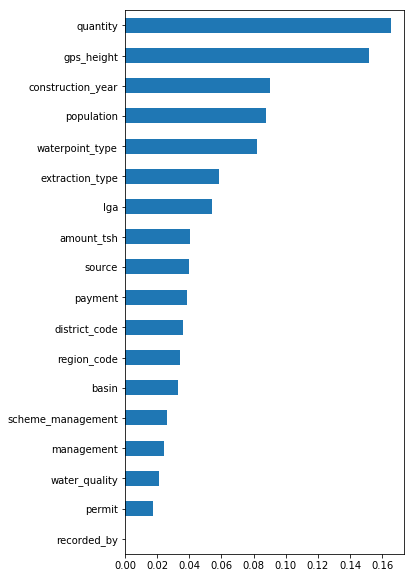

In [33]:
#exploring feature importances 
import matplotlib.pyplot as plt

figsize = (5, 10)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_,X_train.columns).sort_values()
importances.plot.barh()

In [34]:
#exploring permutation importances 
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, cv='prefit', scoring='accuracy', 
                                 n_iter=5, random_state=42)

permuter.fit(X_train_val, y_train_val)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_iter=5, random_state=42, refit=True, scoring='accuracy')

In [36]:
feature_names = X_train_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1109 ± 0.0055,quantity
0.0622 ± 0.0010,waterpoint_type
0.0312 ± 0.0025,extraction_type
0.0289 ± 0.0023,construction_year
0.0193 ± 0.0025,payment
0.0140 ± 0.0013,amount_tsh
0.0122 ± 0.0023,source
0.0113 ± 0.0031,population
0.0089 ± 0.0023,gps_height
0.0078 ± 0.0028,basin


In [37]:
#let's re-import our data and Wrangle our features differently 
#if you press 'esc' the cells become blue and you can use hotkeys, plus copying within the notebook become easier 

In [38]:
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

In [40]:
 X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [41]:
#dropping some features that may be irrelevant 
#reading blogposts led me to do try this out

def explore(X): 
    X = X.copy()
    
#     X = X.drop(columns=['wpt_name'])
#     X = X.drop(columns=['subvillage'])
#     X = X.drop(columns=['funder'])
#     X = X.drop(columns=['installer'])
    
    return X 

X_train = explore(X_train)
X_train_val = explore(X_train_val)  
X_test = explore(test_features)

In [42]:
X_train.shape, X_train_val.shape, X_test.shape

((45042, 40), (14358, 40), (14358, 40))

In [43]:
#this is the function I refered to earlier, it solved my headache, and is also very simple
import category_encoders as ce
def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test

In [44]:
X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)
X_train.shape, X_train_val.shape, X_test.shape

((45042, 40), (14358, 40), (14358, 40))

In [45]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model, X_train_val, y_train_val, scoring='accuracy', cv=2).mean()
accuracy

0.7690486140130938

In [50]:
#calculate predictions for submission
y_pred = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred)
a['status_group'].value_counts()

functional                 8688
non functional             5113
functional needs repair     557
Name: status_group, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.8069368992895947

In [52]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, cv='prefit', scoring='accuracy', 
                                 n_iter=5, random_state=42)

permuter.fit(X_train_val, y_train_val)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_iter=5, random_state=42, refit=True, scoring='accuracy')

In [53]:
feature_names = X_train_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0344 ± 0.0052,quantity
0.0328 ± 0.0027,quantity_group
0.0105 ± 0.0023,waterpoint_type_group
0.0104 ± 0.0033,construction_year
0.0092 ± 0.0018,amount_tsh
0.0086 ± 0.0011,waterpoint_type
0.0071 ± 0.0019,population
0.0062 ± 0.0018,longitude
0.0045 ± 0.0018,latitude
0.0028 ± 0.0011,extraction_type_group


In [54]:
mask = permuter.feature_importances_ > 0 
features = X_train.columns[mask]
X_train = X_train[features]
X_train_val = X_train_val[features]

In [55]:
X_train.shape, X_train_val.shape

((45042, 27), (14358, 27))

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
#calculate predictions for submission
y_pred = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred)
a['status_group'].value_counts()

functional                 8447
non functional             5227
functional needs repair     684
Name: status_group, dtype: int64

In [58]:
#interesting how accuracy score decreases when feature with 0 permutation importance are removed 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.8058225379579329

In [59]:
#let's try XGBoost once again... 

model = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [60]:
y_pred = model.predict(X_train_val)
a = pd.DataFrame(columns={'status_group'}, data=y_pred)
a['status_group'].value_counts()

functional                 9895
non functional             4331
functional needs repair     132
Name: status_group, dtype: int64

In [61]:
accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.7469703301295445

In [62]:
#investigate construction year and GPS height 
test_features.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.062317,-8.453125e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,34.898976,-5.087905e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.221606,-3.314240e+00,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [63]:
#the mode is 0, or NaNs, we will try and replace with the median later on 

test_features['construction_year'].value_counts().sort_values().tail()

2000     473
2008     617
2009     646
2010     649
0       5024
Name: construction_year, dtype: int64

In [64]:
#llikewise for population
test_features['population'].value_counts().sort_values().tail()

250     398
200     423
150     430
1      1701
0      5205
Name: population, dtype: int64

In [66]:
#too many 'NaNs', maybe best to drop 
test_features['num_private'].value_counts().sort_values().tail()

15       12
8        12
5        14
1        21
0     14169
Name: num_private, dtype: int64

In [67]:
#this is strange as well, 436 values at 0, or NaNs
test_features['latitude'].value_counts().sort_values().tail()

-8.645608e+00      1
-2.474560e+00      2
-7.170666e+00      2
-7.105919e+00      2
-2.000000e-08    436
Name: latitude, dtype: int64

In [68]:
#this is strange as well, 436 values at 0, 'Null Island' is not in Tanzania...
#Null Island is where the coordinates 0,0 are located 
test_features['longitude'].value_counts().sort_values().tail()

35.736642      1
37.302281      2
37.260069      2
32.920579      2
0.000000     436
Name: longitude, dtype: int64

In [69]:
#GPS height of 0 does not make sense, NaNs = 0 
#pattern is noticed after a little exploration 
test_features['gps_height'].value_counts().sort_values().tail()

 1343      16
-16        16
 1294      18
-19        18
 0       4978
Name: gps_height, dtype: int64

In [70]:
#Many NaNs here as well since 'Total Static Head' cannot be 0 
test_features['amount_tsh'].value_counts().sort_values().tail()

20.0        348
1000.0      361
50.0        618
500.0       756
0.0       10011
Name: amount_tsh, dtype: int64

In [71]:
#we can most likely drop this feature, it probably explains 0 variance for the model (seen before with permutation importances)
test_features['id'].value_counts().sort_values().tail()

10261    1
34833    1
18441    1
59757    1
65536    1
Name: id, dtype: int64

In [72]:
#as seen with our prior analysis, high cardinality categoricals may be best dealt by dropping
test_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14358,13575,13570,14358,14358,14264,14358,14358,14358,13573,14358,13419,7519,13695,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358
unique,331,960,1075,10615,9,8253,21,124,1934,2,1,11,1772,2,17,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-16,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,Borehole,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,137,2117,4162,822,2535,136,1258,611,79,12308,14358,8807,158,9442,6168,6168,6168,9780,12639,6098,6098,12237,12237,7997,7997,4211,4211,11127,6790,8260


In [73]:
test_features['waterpoint_type_group'].value_counts().sort_values()

dam                      1
cattle trough           33
improved spring        174
other                 1579
hand pump             4311
communal standpipe    8260
Name: waterpoint_type_group, dtype: int64

In [74]:
#not duplicative however they are correlated 
test_features['waterpoint_type'].value_counts().sort_values()

dam                               1
cattle trough                    33
improved spring                 174
communal standpipe multiple    1470
other                          1579
hand pump                      4311
communal standpipe             6790
Name: waterpoint_type, dtype: int64

In [75]:
test_features['source_class'].value_counts().sort_values()

unknown           64
surface         3167
groundwater    11127
Name: source_class, dtype: int64

In [76]:
test_features['source_type'].value_counts().sort_values()

other                     64
dam                      173
rainwater harvesting     515
river/lake              2479
borehole                2942
spring                  3974
shallow well            4211
Name: source_type, dtype: int64

In [77]:
test_features['source'].value_counts().sort_values()

unknown                   20
other                     44
dam                      173
lake                     179
hand dtw                 230
rainwater harvesting     515
river                   2300
machine dbh             2712
spring                  3974
shallow well            4211
Name: source, dtype: int64

In [78]:
#quantity and quantity_group look like duplicates 
test_features['quantity_group'].value_counts().sort_values()

unknown          182
seasonal         982
dry             1518
insufficient    3679
enough          7997
Name: quantity_group, dtype: int64

In [79]:
#quantity and quantity_group look like duplicates 
test_features['quantity'].value_counts().sort_values()

unknown          182
seasonal         982
dry             1518
insufficient    3679
enough          7997
Name: quantity, dtype: int64

In [80]:
test_features['quality_group'].value_counts().sort_values()

fluoride       45
colored       131
milky         188
unknown       461
salty        1296
good        12237
Name: quality_group, dtype: int64

In [81]:
#'water_quality' seems like a further sub-division of 'quality_group'
test_features['water_quality'].value_counts().sort_values()

fluoride abandoned        2
fluoride                 43
salty abandoned          80
coloured                131
milky                   188
unknown                 461
salty                  1216
soft                  12237
Name: water_quality, dtype: int64

In [82]:
#looks like a dupicate feature
test_features['payment_type'].value_counts()

never pay     6098
per bucket    2232
monthly       2067
unknown       1898
on failure     916
annually       897
other          250
Name: payment_type, dtype: int64

In [83]:
#looks like a dupicate feature
test_features['payment'].value_counts()

never pay                6098
pay per bucket           2232
pay monthly              2067
unknown                  1898
pay when scheme fails     916
pay annually              897
other                     250
Name: payment, dtype: int64

In [84]:
test_features['management_group'].value_counts().sort_values()

unknown         112
other           260
parastatal      420
commercial      927
user-group    12639
Name: management_group, dtype: int64

In [85]:
test_features['management'].value_counts().sort_values()

other - school        27
trust                 27
unknown              112
company              173
water authority      209
other                233
parastatal           420
private operator     518
wua                  570
water board          733
wug                 1556
vwc                 9780
Name: management, dtype: int64

In [86]:
test_features['extraction_type_class'].value_counts().sort_values()

wind-powered      35
rope pump        118
motorpump        767
submersible     1566
other           1631
handpump        4073
gravity         6168
Name: extraction_type_class, dtype: int64

In [87]:
#feature that is a subdivision of 'extraction_type_class'
test_features['extraction_type_group'].value_counts().sort_values()

other motorpump      26
india mark iii       35
wind-powered         35
other handpump       83
rope pump           118
afridev             431
india mark ii       620
mono                741
swn 80              897
submersible        1566
other              1631
nira/tanira        2007
gravity            6168
Name: extraction_type_group, dtype: int64

In [88]:
#further subdivision of 'extraction_type_group'
#the question is: do these sub=divided features still add explainability to our model, or are their Gini gain = 0?
test_features['extraction_type'].value_counts().sort_values()

climax                  8
walimi                 12
other - play pump      16
cemo                   18
windmill               35
india mark iii         35
other - swn 81         55
other - rope pump     118
ksb                   370
afridev               431
india mark ii         620
mono                  741
swn 80                897
submersible          1196
other                1631
nira/tanira          2007
gravity              6168
Name: extraction_type, dtype: int64

In [89]:
#looks like the only boolean 
test_features['permit'].value_counts()

True     9442
False    4253
Name: permit, dtype: int64

In [90]:
test_features['scheme_name'].value_counts().sort_values().tail()

Chalinze wate     96
DANIDA           104
K                134
None             149
Borehole         158
Name: scheme_name, dtype: int64

In [91]:
#further subdivision of 'management' feature
test_features['scheme_management'].value_counts().sort_values()

Trust                 20
SWC                   26
Other                229
Private operator     255
Company              279
Parastatal           402
WUA                  654
Water Board          684
Water authority      808
WUG                 1255
VWC                 8807
Name: scheme_management, dtype: int64

In [92]:
#very high cardinality, maybe I should drop it 
test_features['recorded_by'].value_counts().sort_values()

GeoData Consultants Ltd    14358
Name: recorded_by, dtype: int64

In [93]:
#what does this mean? 
test_features['public_meeting'].value_counts()

True     12308
False     1265
Name: public_meeting, dtype: int64

In [94]:
test_features['ward'].value_counts().sort_values().tail()

Kitunda      57
Mdandu       60
Imalinyi     64
Siha Kati    65
Igosi        79
Name: ward, dtype: int64

In [95]:
test_features['lga'].value_counts().sort_values().tail()

Kilosa         270
Kasulu         275
Bariadi        305
Moshi Rural    315
Njombe         611
Name: lga, dtype: int64

In [96]:
test_features['region'].value_counts().sort_values().tail()

Morogoro       1027
Mbeya          1048
Kilimanjaro    1111
Iringa         1252
Shinyanga      1258
Name: region, dtype: int64

In [97]:
test_features['subvillage'].value_counts().sort_values().tail()

Sokoni       62
Kati         91
Madukani    116
Majengo     125
Shuleni     136
Name: subvillage, dtype: int64

In [98]:
test_features['basin'].value_counts().sort_values().tail()

Lake Tanganyika    1592
Internal           1699
Rufiji             1968
Pangani            2153
Lake Victoria      2535
Name: basin, dtype: int64

In [99]:
test_features['wpt_name'].value_counts().sort_values().tail()

Ofisini       67
Msikitini    111
Zahanati     192
Shuleni      414
none         822
Name: wpt_name, dtype: int64

In [100]:
test_features['installer'].value_counts().sort_values().tail()

DANIDA         254
Commu          273
RWE            288
Government     450
DWE           4162
Name: installer, dtype: int64

In [101]:
test_features['funder'].value_counts().sort_values().tail()

Kkkt                       330
World Bank                 335
Hesawa                     573
Danida                     774
Government Of Tanzania    2117
Name: funder, dtype: int64

In [102]:
#we will convert to datetime
test_features['date_recorded'].value_counts().sort_values().tail()

2011-03-14    125
2011-03-18    125
2013-02-03    135
2011-03-17    135
2011-03-16    137
Name: date_recorded, dtype: int64

In [103]:
#as previously confirmed, there are 7 non-numeric features with NaNs
#non NaNs for numeric featuers since NaNs are encoded as 'zeroes'

In [104]:
test_features.isna().sum().sort_values().tail(7)

subvillage             94
permit                663
funder                783
public_meeting        785
installer             788
scheme_management     939
scheme_name          6839
dtype: int64

In [105]:
#since creating a random forest with all the featurs explains ~ 80% of the variance of the model,
#my hypothesis is that by carefully choosing between median/mode/mean for our NaNs we can get a more 
#accurate model then if we just use OrdinalEncoder (which I believe handles NaNs)

In [106]:
test_features['subvillage'].value_counts().head()

Shuleni     136
Majengo     125
Madukani    116
Kati         91
Sokoni       62
Name: subvillage, dtype: int64

In [107]:
test_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.062317,-8.453125e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,34.898976,-5.087905e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.221606,-3.314240e+00,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [108]:
#let's try and impute median for all numerics and then we'll subsequently impute mean

In [109]:
#let's re-import our data and Wrangle our features differently 

test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [111]:
#I ran into issues with replacing and imputing/dropping Nans, commenting out to figure it out 

import numpy as np 

def boom(X):
    X = X.copy()
    
    X = X.drop(columns='id') #id is random and them commented out if not we'll have errors
    
   # since all numeric features have NaNs as 'zeroes' let's first tranform 'zeroes' to Nans
    X['amount_tsh'] = X['amount_tsh'].replace(0, np.NaN) 
    X['gps_height'] = X['gps_height'].replace(0.0, np.NaN)
#     X[['longitude']].replace(0.0, np.NaN, inplace=True)   
#     X[['latitude']].replace(0.0, np.NaN, inplace=True)
#     X[['num_private']].replace(0.0, np.NaN, inplace=True)
#     X[['region_code']].replace(0.0, np.NaN, inplace=True)
#     X[['district_code']].replace(0.0, np.NaN, inplace=True)  
#     X[['population']].replace(0.0, np.NaN, inplace=True)
#     X[['construction_year']].replace(0.0, np.NaN, inplace=True)
     
    #now we shall replace NaNs with the median
    X['amount_tsh'] = X['amount_tsh'].fillna(X['amount_tsh'].median())
    X['gps_height'] = X['gps_height'].fillna(X['gps_height'].median())
#     X[['longitude']].fillna(X[['longitude']].median())
#     X[['num_private']].fillna(X[['num_private']].median())
#     X[['region_code']].fillna(X[['region_code']].median())
#     X[['district_code']].fillna(X[['district_code']].median())
#     X[['population']].fillna(X[['population']].median())
#     X[['construction_year']].fillna(X[['construction_year']].median())
    
    
    return X

X_train = boom(X_train)
X_train_val = boom(X_train_val)  
X_test = boom(test_features)

In [112]:
X_train['amount_tsh'].value_counts().head()

250.0     31997
500.0      2344
50.0       1888
1000.0     1122
20.0       1111
Name: amount_tsh, dtype: int64

In [113]:
import category_encoders as ce
def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test


In [114]:
X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)
X_train.shape, X_train_val.shape, X_test.shape

((45042, 39), (14358, 39), (14358, 39))

In [115]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [116]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [117]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional                 8488
non functional             5297
functional needs repair     573
Name: status_group, dtype: int64

In [118]:
#best score so far, let's try and do mean imputing now 
accuracy = accuracy_score(y_train_val, y_pred)
accuracy
#0.8116729349491573
#0.8083298509541719
#0.8117425825323862
#0.8066583089566792
#0.8038724056275247
#0.8076333751218833
#0.8106978687839532

0.8118818776988439

In [119]:
(0.8116729349491573+0.8083298509541719+0.8117425825323862+0.8066583089566792+0.8038724056275247+0.8076333751218833+0.8106978687839532)/7

0.8086581895608222

In [120]:
#let's submit and see how well it performs with Kaggle's dataset 
#calculate predictions for submission
y_pred_submission = model.predict(X_test)
a = pd.DataFrame(columns={'status_group'}, data=y_pred_submission)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_submission
submission.to_csv('lastday.csv', index=False)

In [121]:
#let's see if we can improve further 

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, cv='prefit', scoring='accuracy', 
                                 n_iter=2, random_state=42)

permuter.fit(X_train_val, y_train_val)

feature_names = X_train_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0404 ± 0.0026,quantity
0.0287 ± 0.0015,quantity_group
0.0112 ± 0.0017,construction_year
0.0101 ± 0.0023,population
0.0101 ± 0.0003,longitude
0.0081 ± 0.0007,waterpoint_type
0.0053 ± 0.0010,payment
0.0052 ± 0.0008,latitude
0.0034 ± 0.0016,waterpoint_type_group
0.0033 ± 0.0014,funder


In [122]:
mask = permuter.feature_importances_ > 0 
features = X_train.columns[mask]
X_train = X_train[features]
X_train_val = X_train_val[features]

In [123]:
X_train_val.shape

(14358, 36)

In [124]:
#lets run our Random Forest Classifier without these features our permuter has deemed irrelevant  
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [125]:
#our model performs worst without our permuted features 
#what else could we try and do to improve our model? 
#I believe subtlety lies in how we handle feature NaNs 

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()


accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.8096531550355203

In [126]:
#let's re-import our data and Wrangle our features by imputing the mean 
#we have seen that our Random Forest Classifer performs marginally better with Median imputing 

test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [130]:
import numpy as np 

def boom(X):
    X = X.copy()
    
    X = X.drop(columns='id') #id is random and them commented out if not we'll have errors
    
    X['amount_tsh'] = X['amount_tsh'].replace(0, np.NaN)
    X['gps_height'] = X['gps_height'].replace(0.0, np.NaN)
    X['longitude'] = X['longitude'].replace(0.0, np.NaN)  
    X['latitude'] = X['latitude'].replace(-2.000000e-08 , np.NaN)
    X['num_private'] = X['num_private'].replace(0.0, np.NaN)
    X['region_code'] = X['region_code'].replace(0.0, np.NaN)
    X['district_code'] = X['district_code'].replace(0.0, np.NaN) 
    X['population'] = X['population'].replace(0.0, np.NaN)
    X['construction_year'] = X['construction_year'].replace(0.0, np.NaN)
    
      
    #now we shall replace NaNs with the mean
    X['amount_tsh'] = X['amount_tsh'].fillna(X['amount_tsh'].mean())
    X['gps_height'] = X['gps_height'].fillna(X['gps_height'].mean())
    X['longitude'] = X['longitude'].fillna(X['longitude'].mean())
    X['latitude'] = X['latitude'].fillna(X['latitude'].mean())
    X['num_private'] = X['num_private'].fillna(X['num_private'].mean())
    X['region_code'] = X['region_code'].fillna(X['region_code'].mean())
    X['district_code'] = X['district_code'].fillna(X['district_code'].mean())
    X['population'] = X['population'].fillna(X['population'].mean())
    X['construction_year'] = X['construction_year'].fillna(X['construction_year'].mean())
    
    
    
    #instead of dropping NaNs, let's replace with 'other', essentially it will add a new class to our features
    X[['subvillage']] = X[['subvillage']].fillna('other')
    X[['permit']] = X[['permit']].fillna('other')
    X[['funder']] = X[['funder']].fillna('other')
    X[['public_meeting']] = X[['public_meeting']].fillna('other')
    X[['installer']] = X[['installer']].fillna('other')
    X[['scheme_management']] = X[['scheme_management']].fillna('other')
    X[['scheme_name']] = X[['scheme_name']].fillna('other')
    
    return X

X_train = boom(X_train)
X_train_val = boom(X_train_val)  
X_test = boom(test_features)

In [131]:
X_train['gps_height'].tail()

26175     673.000000
29039     367.000000
56235    1583.000000
42178    1017.298401
22753     299.000000
Name: gps_height, dtype: float64

In [132]:
import category_encoders as ce
def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test


In [133]:
X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)
X_train.shape, X_train_val.shape, X_test.shape

((45042, 39), (14358, 39), (14358, 39))

In [134]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [136]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional                 8681
non functional             5081
functional needs repair     596
Name: status_group, dtype: int64

In [137]:
#best score so far, let's try and do mean imputing now 
#we got a slightly better score 
#performs slightly worst then median imputing on average 
accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.804708176626271

In [139]:
#let's see if we can improve further 

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, cv='prefit', scoring='accuracy', 
                                 n_iter=2, random_state=42)

permuter.fit(X_train_val, y_train_val)

feature_names = X_train_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0483 ± 0.0013,quantity
0.0215 ± 0.0010,quantity_group
0.0116 ± 0.0008,waterpoint_type
0.0089 ± 0.0003,construction_year
0.0071 ± 0.0009,population
0.0050 ± 0.0009,longitude
0.0044 ± 0.0010,latitude
0.0040 ± 0.0010,extraction_type_class
0.0036 ± 0.0015,payment
0.0032 ± 0.0021,waterpoint_type_group


In [140]:
#Last try to improve our model, we will further wrangle our data 

In [147]:
#let's replace these with median:
#subvillage, either drop Nans or assign to majority class (Shuleni region)
#permit is boolean, either we drop NaNs or we set it to majority class('True') - may be better to drop
#funder, either drop Nans or assign to majority class (Government of Tanzania)
#public meeting is boolean, either we drop NaNs or we set it to majority class('True') - may be better to drop
#installer has high cardinality, maybe best to drop NaNs
#scheme_management, either assign to majority class or drop Nans
#scheme_name probably best dealt by dropping Nans

test_features.isna().sum().sort_values().tail(7)

subvillage             94
permit                663
funder                783
public_meeting        785
installer             788
scheme_management     939
scheme_name          6839
dtype: int64

In [148]:
#let's re-import our data and Wrangle our features differently 

test_features = pd.read_csv('test_features.csv')

train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=len(test_features))

X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((45042, 40), (14358, 40), (45042, 2), (14358, 2))

In [150]:
import numpy as np 

def boom(X):
    X = X.copy()
    
    #note: some bits are commented out, the model was itirated upon and commented out sections did not add value
    
   #X = X.drop(columns='payment_type') #this feature is duplicatibe of 'payment' feature 
    
    X = X.drop(columns='id') #id is random and them commented out if not we'll have errors
    
   #since all numeric features have NaNs as 'zeroes' let's first tranform 'zeroes' to Nans
   #the exception here is 'latitude' whose NaNs are encoded as '-2.000000e-08' which is 'zero'
    X['amount_tsh'] = X['amount_tsh'].replace(0, np.NaN)
    X['gps_height'] = X['gps_height'].replace(0.0, np.NaN)
    X['longitude'] = X['longitude'].replace(0.0, np.NaN)  
    X['latitude'] = X['latitude'].replace(-2.000000e-08 , np.NaN)
    X['num_private'] = X['num_private'].replace(0.0, np.NaN)
    X['region_code'] = X['region_code'].replace(0.0, np.NaN)
    X['district_code'] = X['district_code'].replace(0.0, np.NaN) 
    X['population'] = X['population'].replace(0.0, np.NaN)
    X['construction_year'] = X['construction_year'].replace(0.0, np.NaN)
    
      
    #now we shall replace NaNs with the median
    X['amount_tsh'] = X['amount_tsh'].fillna(X['amount_tsh'].median())
    X['gps_height'] = X['gps_height'].fillna(X['gps_height'].median())
    X['longitude'] = X['longitude'].fillna(X['longitude'].median())
    X['latitude'] = X['latitude'].fillna(X['latitude'].median())
    X['num_private'] = X['num_private'].fillna(X['num_private'].median())
    X['region_code'] = X['region_code'].fillna(X['region_code'].median())
    X['district_code'] = X['district_code'].fillna(X['district_code'].median())
    X['population'] = X['population'].fillna(X['population'].median())
    X['construction_year'] = X['construction_year'].fillna(X['construction_year'].median())
    
    
    
    #instead of dropping NaNs, let's replace with 'other', essentially it will add a new class to our features
    X[['subvillage']] = X[['subvillage']].fillna('other')
    X[['permit']] = X[['permit']].fillna('other')
    X[['funder']] = X[['funder']].fillna('other')
    X[['public_meeting']] = X[['public_meeting']].fillna('other')
    X[['installer']] = X[['installer']].fillna('other')
    X[['scheme_management']] = X[['scheme_management']].fillna('other')
    X[['scheme_name']] = X[['scheme_name']].fillna('other')
    
    
    
    #convert to datetime, our tree model probably takes as is, however let's be thorough 
    #X[['date_recorded']] = pd.to_datetime(X['date_recorded'])
    #X[['date_recorded']] = pd.to_numeric(X['date_recorded'])
    
    return X


X_train = boom(X_train)
X_train_val = boom(X_train_val)  
X_test = boom(test_features)

In [151]:
import category_encoders as ce

def encode(X_train, X_train_val, X_test):
    X_train = X_train.copy()
    X_train_val = X_train_val.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train =  encode.fit_transform(X_train)
    X_train_val = encode.fit_transform(X_train_val)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_train_val, X_test

X_train, X_train_val, X_test = encode(X_train, X_train_val, X_test)

In [152]:
X_train.shape, X_train_val.shape, y_train.shape, X_test.shape

((45042, 39), (14358, 39), (45042, 2), (14358, 39))

In [153]:
y_train = y_train['status_group']
y_train_val = y_train_val['status_group']

In [182]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, n_estimators=300,
                                n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [155]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional                 8575
non functional             5165
functional needs repair     618
Name: status_group, dtype: int64

In [156]:
accuracy = accuracy_score(y_train_val, y_pred)
accuracy

0.8065886613734503

In [157]:
y_pred_submission = model.predict(X_test)
submission = pd.DataFrame(columns=['status_group'], data=y_pred_submission)
y_pred['status_group'].value_counts()

functional                 8575
non functional             5165
functional needs repair     618
Name: status_group, dtype: int64

In [158]:
# sample_submission = pd.read_csv('sample_submission.csv')
# submission = sample_submission.copy()
# submission['status_group'] = y_pred_submission
# submission.to_csv('mega10.csv', index=False)

In [159]:
#Filenames of your submissions you want to ensemble
#borrowed code from DS1/DS2 student posted by Ryan 
#the code below is amazing, it allows us to increase our model accuracy even further, 
#prior to submitting on Kaggle  
files = ['mega1.csv', 'mega2.csv', 'mega3.csv', 'mega4.csv',
         'mega5.csv', 'mega6.csv', 'mega7.csv', 'mega8.csv',
         'mega9.csv', 'mega10.csv']

submissions = (pd.read_csv(file)[['status_group']] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = majority_vote
submission.to_csv('mega-model.csv', index=False)

In [ ]:
#some visuals: 

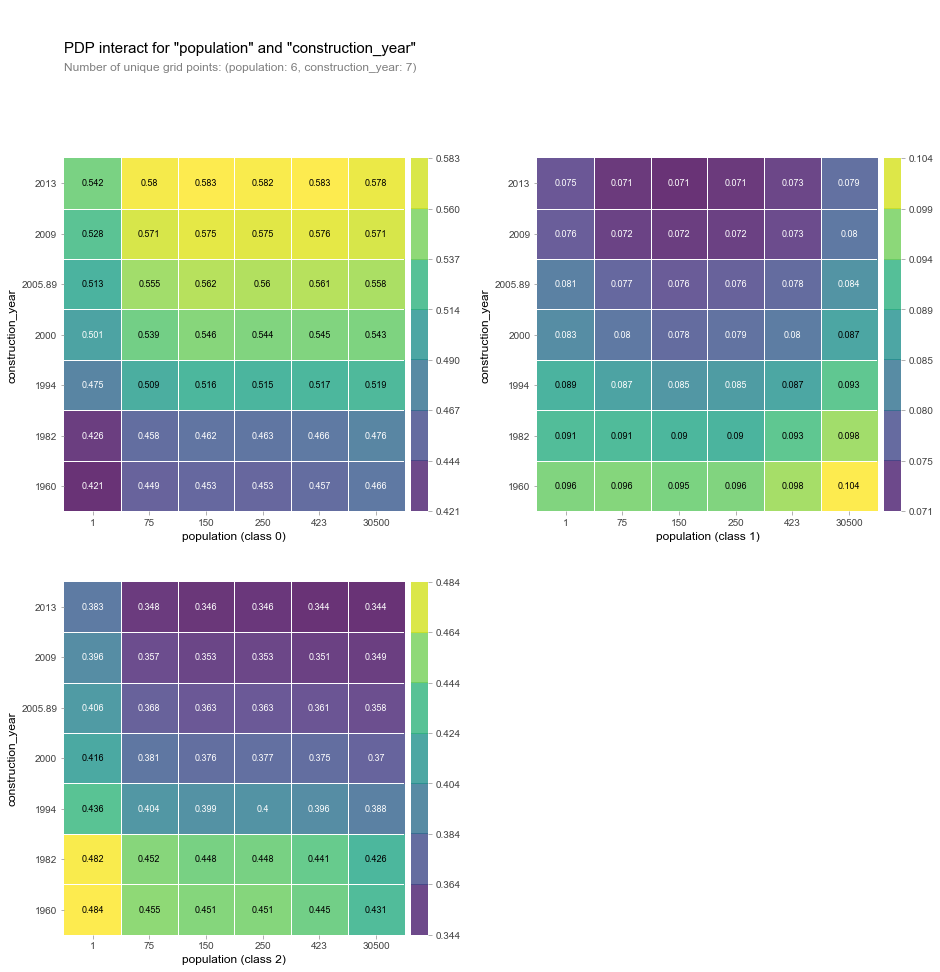

In [191]:
#have to investigate why there are 3 classes for each PDP plot 
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['population', 'construction_year']

interaction = pdp_interact(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [201]:
test_features = pd.read_csv('test_features.csv')

train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

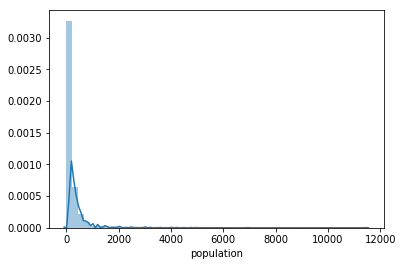

In [203]:
import seaborn as sns 
sns.distplot(test_features['population'])

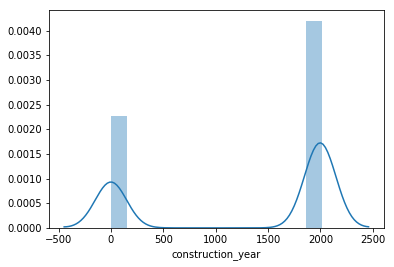

In [204]:
sns.distplot(test_features['construction_year'])

In [170]:
#trying other models, nothing knew just seeing if they work differently with wrangling done differently 
#apparently not
#Random Forest Classifier worked best 

In [171]:
#let's try XGBoost 

model = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=200, booster='dart')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='multi:softprob',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [172]:
y_pred = model.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional                 9918
non functional             4174
functional needs repair     266
Name: status_group, dtype: int64

In [173]:
accuracy_score(y_train_val, y_pred)

0.7557459256163811

In [174]:
#how about decision tree classifier?

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [175]:
y_pred = model.predict(X_train_val)
y_pred = pd.DataFrame(columns=['status_group'], data=y_pred)
y_pred['status_group'].value_counts()

functional                 6893
non functional             5931
functional needs repair    1534
Name: status_group, dtype: int64

In [176]:
accuracy_score(y_train_val, y_pred)

0.6720991781585179